In [ ]:
#CAPSTONE NOTEBOOK

In [ ]:
#Per my EDA discussion with my advisor (Savio), I will focus on the red vinho verde dataset for development and training of my models.  Also, I will focus on using classification
#models, as this problem can also be approached with linear regression as well.  However, classification models make the results much clearer in terms of understanding the success
#(accuracy) of the results.

In [ ]:
#BUSINESS UNDERSTANDING/GOAL:
#Each wine in the dataset is given a quality score by a human wine judge
#The scores in the dataset range from 3 to 8, higher scores reflect higher quality (better tasting) wines
#The goal would be to accurately predict the wine score of red wines based on the 11 physical/chemical characterisitcs or properties
#(features)in the dataset
#Formulated as a question: Can ML models accurately predict the wine quality score based on these characteristics?
#Can a wine drinker or a winemaker determine which wines will taste good based on these characteristics?

In [ ]:
#REVIEW/EXPLORE THE DATASET
#My datasets come from UCI (https://archive.ics.uci.edu/dataset/186/wine+quality)
#Explores wine quality and targets a score based on 11 features for red Vinho Verde wine from northern Portugal
#The wines are scored by human judges in a range of 3 to 8 in this dataset

In [1]:
#list of libraries used thoughout the Jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
#read datafiles into pandas
red_vinho = pd.read_csv('winequality-red.csv', sep=';')



In [ ]:

red_vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Note: 'quality' score by judges has min score of 3 and the max score of 8
#some values are considerably larger than others so normalizing the data will be important for certain models
red_vinho.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#relatively few wines score high or low
#will balance of classes pose a problem in model traning?
red_vinho['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
#Below shows there are duplicates, my understanding from the data source is they represent unique independent observations,
#so it is appropriate to keep these duplicates in the dataset
#Eliminating them would discard useful information
print(red_vinho.duplicated().sum())

240


In [ ]:
#It seems like the human judges assigned pretty consistent 'quality' to wines with same properties
red_vinho.loc[red_vinho.duplicated(keep=False), :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [ ]:
#check for missing values
print(red_vinho.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


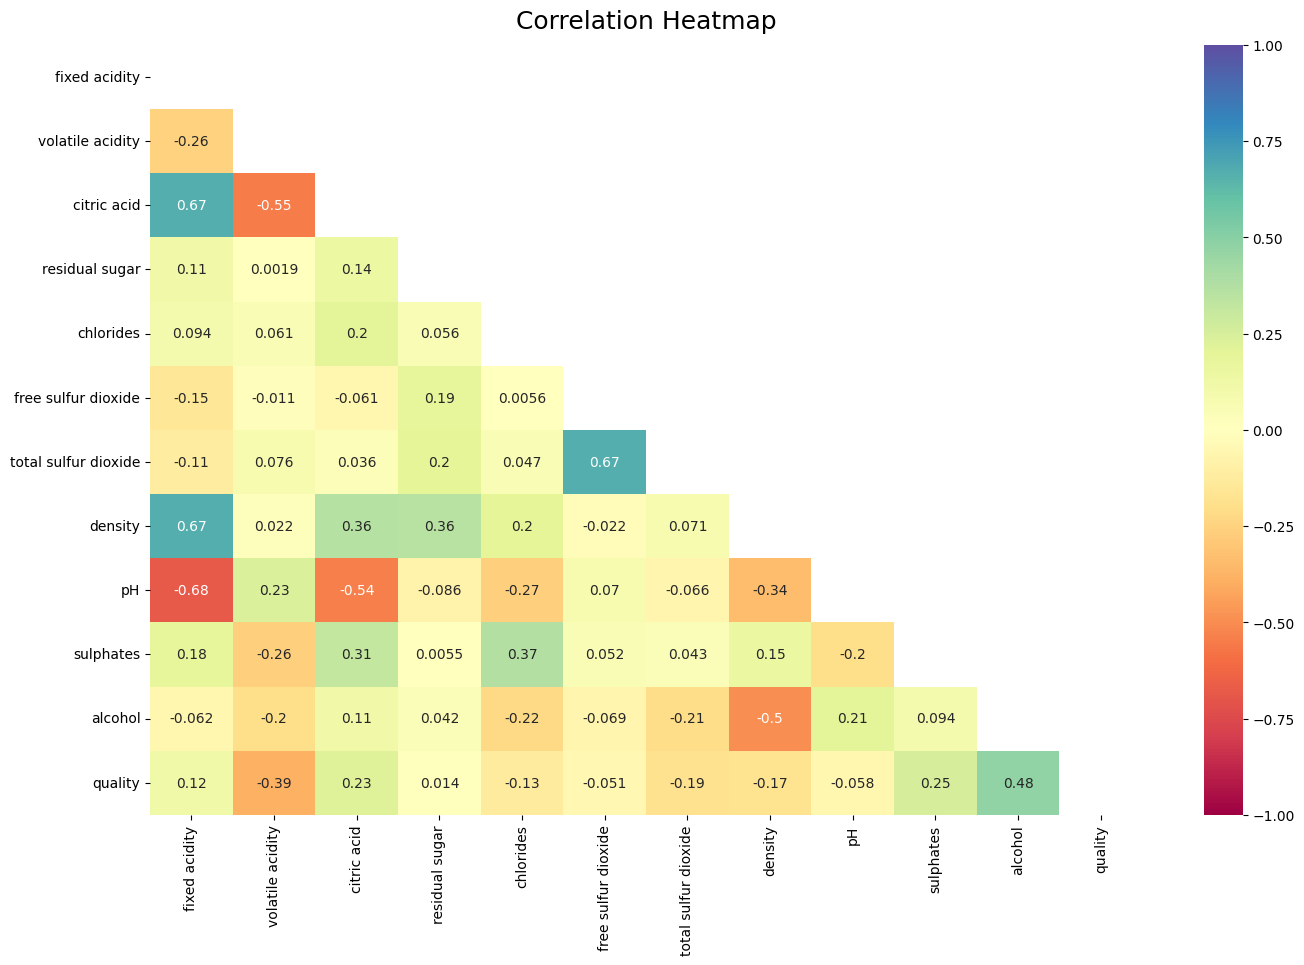

In [ ]:
#Heatmap below reveals interestng relationships in the dataset and that more than just alcohol and sugars influence wine quality
#quality has a  relatively positive correlation to 'alcohol', 'sulphates','residual sugar', 'citric acid', 'fixed acidity'
#and a relatively negitive correlation to 'volatile acidity''total sulfer dioxide', 'density', 'chlorides'

#Noteworthy is relatively strong positive correlations among pairs of certain features (properties) such as:
#'fixed acidity' and 'citric acid', 'total sulfer dioxide' and 'free sulfer dioxide', 'density' and 'fixed acidity', 'pH and
#'fixed acidity'



plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(red_vinho.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral', mask=np.triu(red_vinho.corr()))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.savefig('red_wine_heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
#Scatter plots below indicate a pretty linear relationship with key features that are most highly correlated (positive and negative)
# with the target variable  of 'quality'
#This is useful when thinking about feature engineering such as polynomial transformation.  It indicates the linearity of the relationship, which is consistent with
#earlier testing of polynomial transformation in my capstone EDA

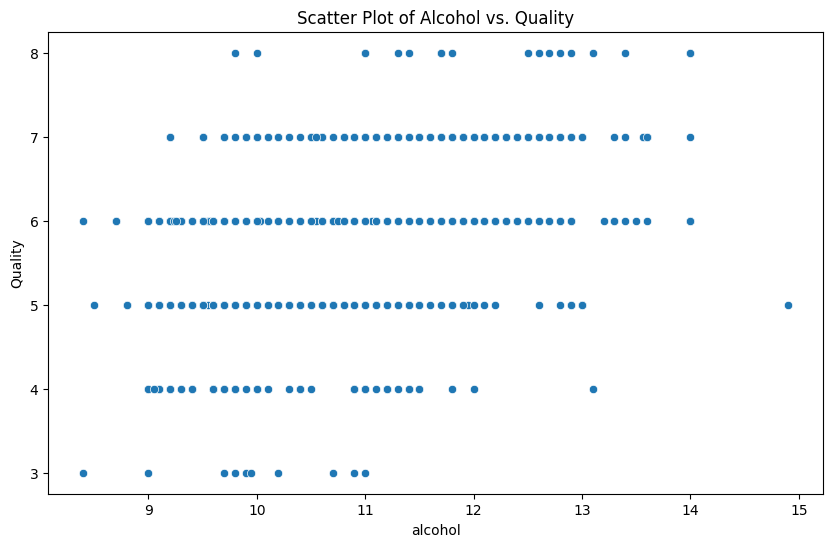

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=red_vinho)
plt.title('Scatter Plot of Alcohol vs. Quality')
plt.xlabel('alcohol')
plt.ylabel('Quality')
plt.show()

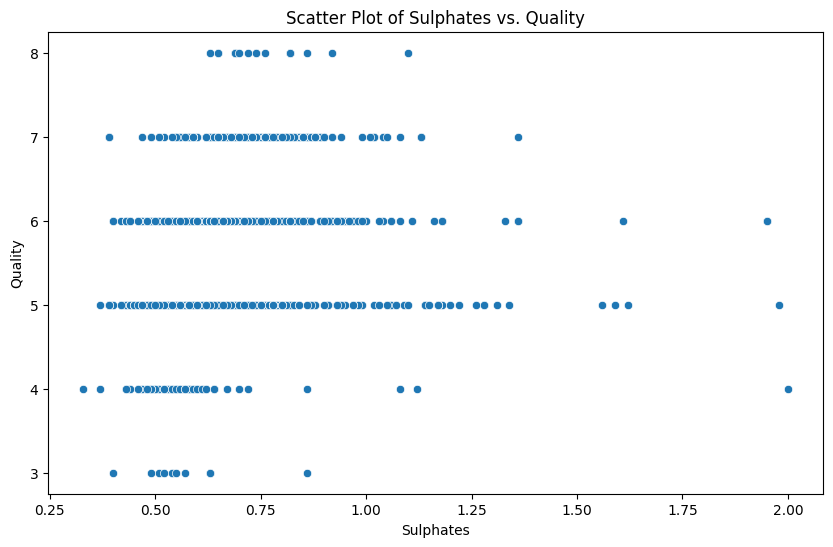

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sulphates', y='quality', data=red_vinho)
plt.title('Scatter Plot of Sulphates vs. Quality')
plt.xlabel('Sulphates')
plt.ylabel('Quality')
plt.show()

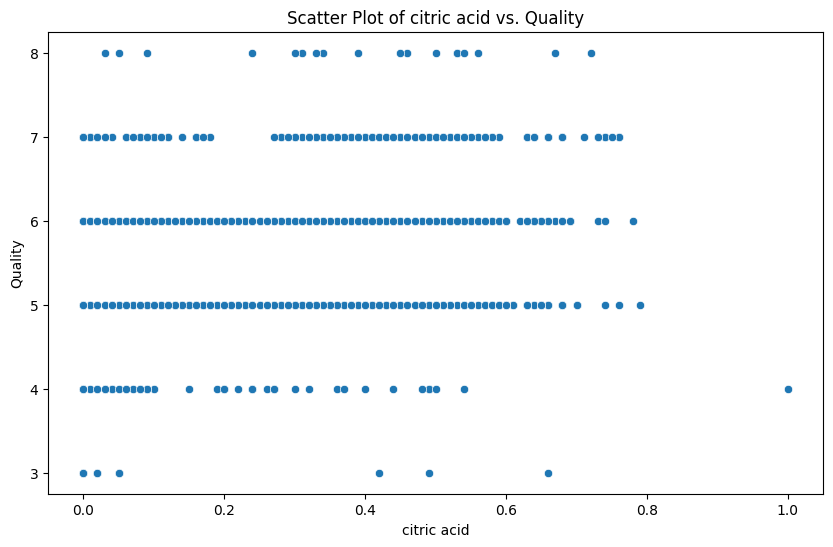

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='citric acid', y='quality', data=red_vinho)
plt.title('Scatter Plot of citric acid vs. Quality')
plt.xlabel('citric acid')
plt.ylabel('Quality')
plt.show()

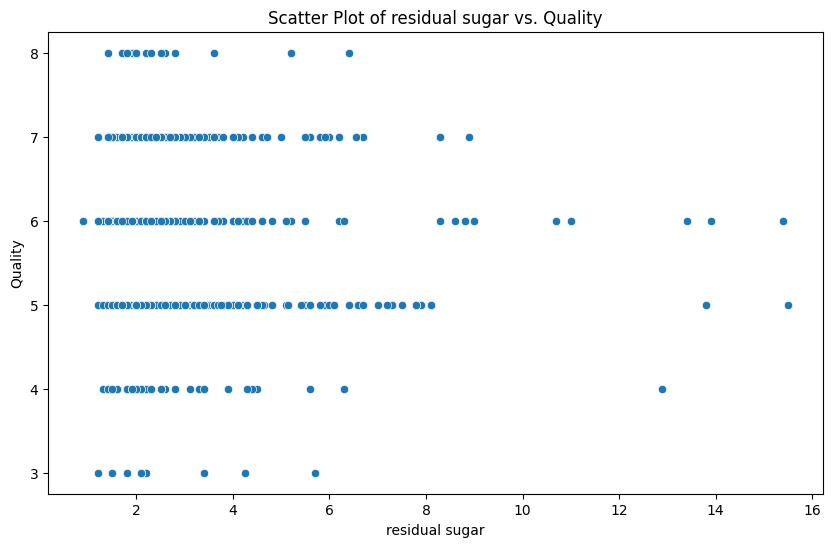

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='residual sugar', y='quality', data=red_vinho)
plt.title('Scatter Plot of residual sugar vs. Quality')
plt.xlabel('residual sugar')
plt.ylabel('Quality')
plt.show()

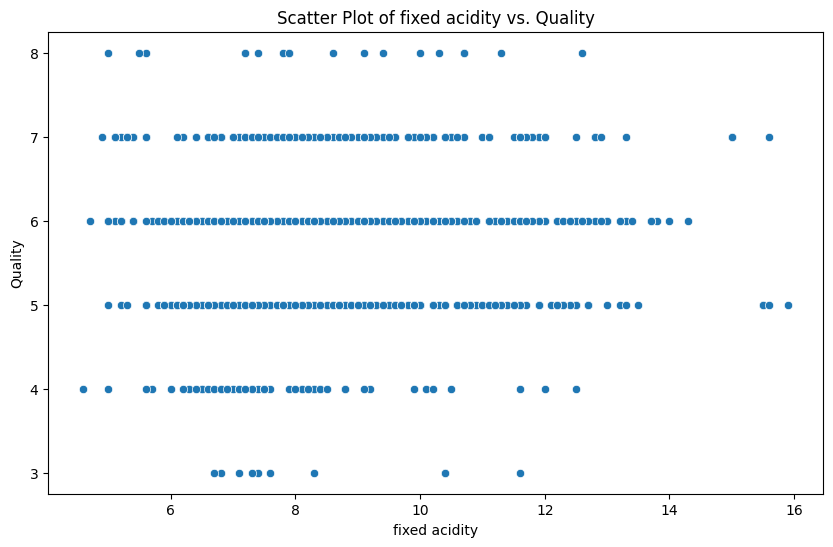

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fixed acidity', y='quality', data=red_vinho)
plt.title('Scatter Plot of fixed acidity vs. Quality')
plt.xlabel('fixed acidity')
plt.ylabel('Quality')
plt.show()

In [ ]:
#stronger negative correlation

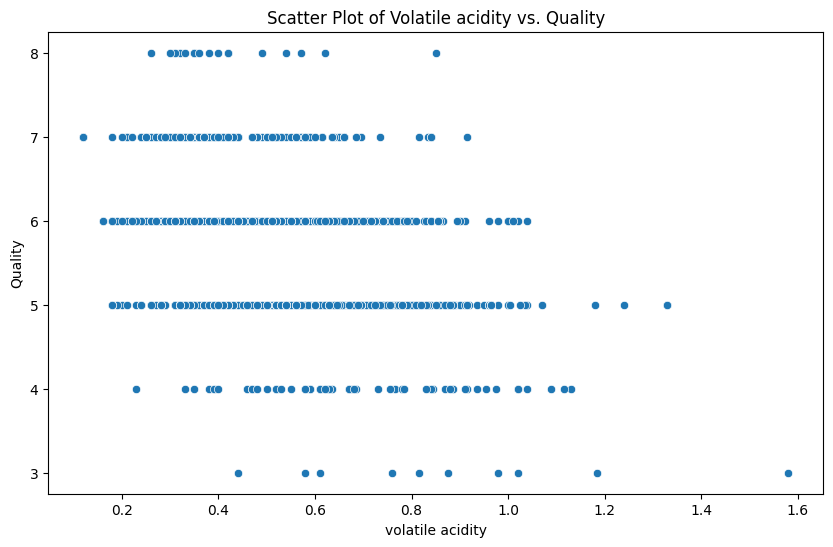

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='volatile acidity', y='quality', data=red_vinho)
plt.title('Scatter Plot of Volatile acidity vs. Quality')
plt.xlabel('volatile acidity')
plt.ylabel('Quality')
plt.show()

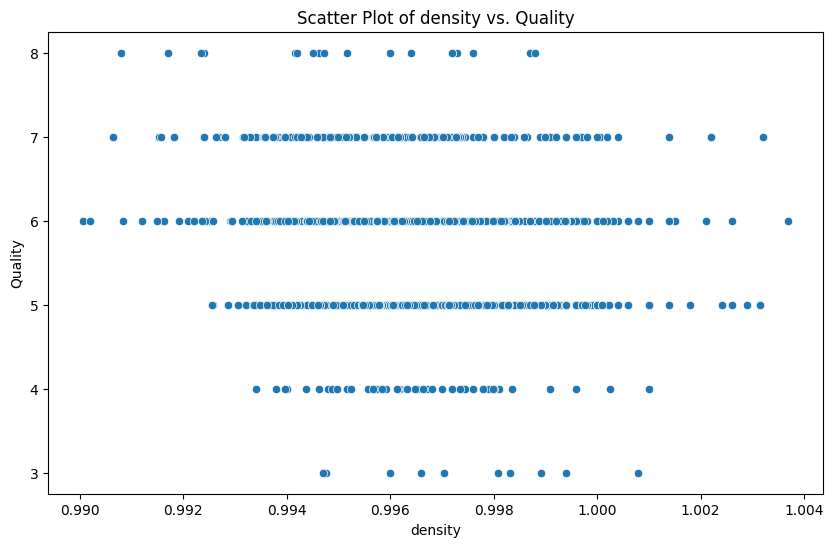

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='quality', data=red_vinho)
plt.title('Scatter Plot of density vs. Quality')
plt.xlabel('density')
plt.ylabel('Quality')
plt.show()

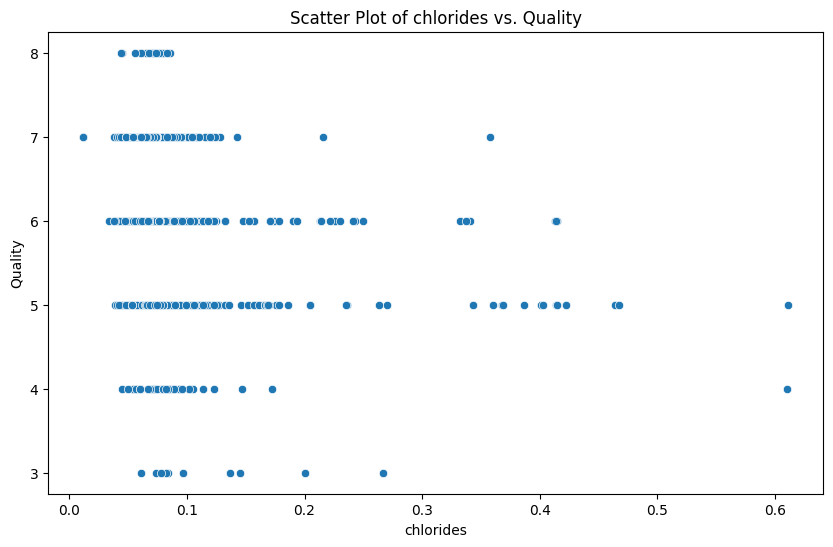

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='chlorides', y='quality', data=red_vinho)
plt.title('Scatter Plot of chlorides vs. Quality')
plt.xlabel('chlorides')
plt.ylabel('Quality')
plt.show()

In [ ]:
#MODELING:
#As previously stated modeling could be appraoched two ways:
#We could use linear regression modeling to predict a rating value (real number) and then match that to the closest class value
#Alternatively, we could view each 'quality'rating as a class and use a multi-class classification model
#After EDA and talking with Savio, it seems the classification approach makes the most sense as it is more deterministic and accuracy
#is a clearer measurement of the results than MSE
#For the capstone I will investigate several different classifier models to solve this multi-class problem: Logistic Regression, KNN, Decision Tree, SVC,
#and at least one or more ensemble method, such as Random Forest
#Also I will use GridSearchCV extensively to tune hyperparameters to produce the optimal results
#I will also do some feature engineering as seems appropriate to improve model performance

In [3]:
#split dataset into X and y with 'quality' as the target
X_red = red_vinho.drop('quality', axis=1)
y_red = red_vinho['quality']

In [ ]:
#look at X_red dataset
X_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [4]:
#split the data into train test datasets
from sklearn.model_selection import train_test_split
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)


In [ ]:
#LOGISTIC REGRESSION CLASSIFIER (first model to test)

In [5]:
#pipeline scales data and explores Logistic Regression classifier using default hyperparameters
from sklearn.linear_model import LogisticRegression
lrc_pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('classifier', LogisticRegression())])
lrc_pipe.fit(X_train_red, y_train_red)

Pipeline(steps=[('scaling', StandardScaler()),
                ('classifier', LogisticRegression())])

In [ ]:
#lrc accuracy score on test set
lrc_pipe.score(X_test_red, y_test_red)

0.575

In [8]:
#Use GridSearchCV to tune Logistic Regression hyperprarmeters on LR model above

param_grid_lrc = {
    'classifier__C': [0.001, 0.01, 0.067, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [5000]
}

#set up GridSearchCV for lrc_pipe
lrc_grid = GridSearchCV(lrc_pipe, param_grid_lrc, cv=5, scoring='accuracy', verbose=1)

#fit to the training data
lrc_grid.fit(X_train_red, y_train_red)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.067, 0.1, 1, 10, 100],
                         'classifier__max_iter': [5000],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [9]:
# Best parameters and best score
print('Best parameters', lrc_grid.best_params_)
print('Best cross-validation accuracy', lrc_grid.best_score_)

# Score best model on the test set
test_accuracy_lrc = lrc_grid.score(X_test_red, y_test_red)
print('Test set accuracy with best parameters', test_accuracy_lrc)

Best parameters {'classifier__C': 0.067, 'classifier__max_iter': 5000, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best cross-validation accuracy 0.6083363970588235
Test set accuracy with best parameters 0.5625


In [ ]:
#SFS with GridSearchCV
#want to explore optimal feature set
#build new pipeline with SequentialFeatureSelector to see which wine properties (features) have the most impact on score
#using the best_C from above
from sklearn.feature_selection import SequentialFeatureSelector
lrc_sfs_pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('selector', SequentialFeatureSelector(LogisticRegression(C=0.067), n_features_to_select=10)),
    ('classifier', LogisticRegression(C=0.06734151))])
#fit SFS to the training data
lrc_sfs_pipe.fit(X_train_red, y_train_red)


Pipeline(steps=[('scaling', StandardScaler()),
                ('selector',
                 SequentialFeatureSelector(estimator=LogisticRegression(C=0.067),
                                           n_features_to_select=10)),
                ('classifier', LogisticRegression(C=0.06734151))])

In [ ]:
#SFS as a greedy selector chooses the features that return the best accuracy score
#the best score comes from selecting 10 features as indicated below

print('Cross-validation accuracy', lrc_sfs_pipe.score(X_train_red, y_train_red))
print('Test set accuracy', lrc_sfs_pipe.score(X_test_red, y_test_red))
print('Number of features selected', lrc_sfs_pipe.named_steps['selector'].get_support().sum())
print('Features selected:', lrc_sfs_pipe.named_steps['selector'].get_feature_names_out(X_train_red.columns))


Cross-validation accuracy 0.616106333072713
Test set accuracy 0.56875
Number of features selected 10
Features selected: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density'
 'sulphates' 'alcohol']


In [ ]:
#SFS with GridSearchCV to see if there is a subset of the features that produce a equal or better result
#Result indicates 7 of the features come very close to all 10 in predictive accuracy
lrc_sfs_grid = GridSearchCV(lrc_sfs_pipe, param_grid={'selector__n_features_to_select': range(1,10)}, cv=5, scoring='accuracy', verbose=1)
lrc_sfs_grid.fit(X_train_red, y_train_red)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('selector',
                                        SequentialFeatureSelector(estimator=LogisticRegression(C=0.067),
                                                                  n_features_to_select=10)),
                                       ('classifier',
                                        LogisticRegression(C=0.06734151))]),
             param_grid={'selector__n_features_to_select': range(1, 10)},
             scoring='accuracy', verbose=1)

In [ ]:

#accuracy score of model with 7 best features is slighly less accurate than model with all 10 features, but pretty close
print('Best parameters', lrc_sfs_grid.best_params_)
print('Best cross-validation accuracy', lrc_sfs_grid.best_score_)
print('Best test set accuracy', lrc_sfs_grid.score(X_test_red, y_test_red))
print('Number of features selected', lrc_sfs_grid.best_estimator_.named_steps['selector'].get_support().sum())
print('Features selected',lrc_sfs_grid.best_estimator_.named_steps['selector'].get_feature_names_out(X_train_red.columns))


Best parameters {'selector__n_features_to_select': 7}
Best cross-validation accuracy 0.604436274509804
Best test set accuracy 0.5625
Number of features selected 7
Features selected ['volatile acidity' 'citric acid' 'chlorides' 'free sulfur dioxide'
 'total sulfur dioxide' 'sulphates' 'alcohol']


In [ ]:
#K-NEAREST NEIGHBORS (KNN) (next model to test)

In [ ]:
#build pipeline and fit the KNN model using standard scaling and default hyperparameters
knn_pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('classifier', KNeighborsClassifier())])
knn_pipe.fit(X_train_red, y_train_red)

Pipeline(steps=[('scaling', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [ ]:
#check accuracy of knn_pipe
print('Test accuracy KNN',knn_pipe.score(X_test_red, y_test_red))


Test accuracy KNN 0.546875


In [ ]:
#GridSearch CV on KNN to tune hyperparameters
#Define the grid to tune number of neighbors
param_grid_knn = {
    'classifier__n_neighbors': range(1, 21)
}
#build the KNN GridSearchCV
knn_grid = GridSearchCV(knn_pipe, param_grid_knn, cv=5, scoring='accuracy', verbose=1)

#fit the data
knn_grid.fit(X_train_red, y_train_red)

# Print the best parameters and best score
print('Best parameters for KNN' , knn_grid.best_params_)
print('Best cross-validation accuracy for KNN', knn_grid.best_score_)
test_accuracy_knn = knn_grid.score(X_test_red, y_test_red)
print('Best test set accuracy', test_accuracy_knn)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for KNN {'classifier__n_neighbors': 1}
Best cross-validation accuracy for KNN 0.6130177696078432
Best test set accuracy 0.621875


In [ ]:
#SVC CLASSIFIER (next model to test)

In [ ]:
#build and fit the SVC pipeline
svc_pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('classifier', SVC())])
svc_pipe.fit(X_train_red, y_train_red)

Pipeline(steps=[('scaling', StandardScaler()), ('classifier', SVC())])

In [ ]:
#check the accuracy of the svc_pipe
#so far this is the best model without any tuning
print('Test accuracy SVC', svc_pipe.score(X_test_red, y_test_red))

Test accuracy SVC 0.603125


In [ ]:
#GridSearchCV on SVC to tune hyperparameters
# Define the parameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10, 100], #values for C per my research on typical values to try
    'classifier__kernel': ['linear', 'rbf'] #try these two kernels
}

# build the GridSearchCV
svc_grid = GridSearchCV(svc_pipe, param_grid, cv=5, scoring='accuracy', verbose=1)

# fit to the training data
svc_grid.fit(X_train_red, y_train_red)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [ ]:
#slight improvement with hyperparameter tuning on the SVC model
# Print the best parameters and best score
print('Best parameters', svc_grid.best_params_)
print('Best cross-validation accuracy', svc_grid.best_score_)

# score the best model on the test set
test_accuracy = svc_grid.score(X_test_red, y_test_red)
print('Best test set accuracy', test_accuracy)

Best parameters {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Best cross-validation accuracy 0.6364736519607843
Best test set accuracy 0.609375


In [ ]:
#DECISION TREE CLASSIFIER (next model to test)

In [ ]:
#For the Decision Tree classifier we will not use scaling, as it usually does not matter and it is easier to interpret the spitting
#criteria without scaling


#build Decision Tree pipeline with default parameters
dtree_pipe = Pipeline([
    ('classifier', DecisionTreeClassifier())])
dtree_pipe.fit(X_train_red, y_train_red)


Pipeline(steps=[('classifier', DecisionTreeClassifier())])

In [ ]:
#score dtree_pipe on test data
print('Decision Tree test accuracy', dtree_pipe.score(X_test_red, y_test_red))

Decision Tree test accuracy 0.578125


In [ ]:
#check depth of dtree_pipe above
print('default tree depth', dtree_pipe.named_steps['classifier'].get_depth())

default tree depth 17


In [ ]:
#GridSearchCV on Decision Tree to tune hyperparameters

# Define the parameter grid to tune max_depth
param_grid_dtree = {
    'classifier__max_depth': range(5, 20)
}

# Build GridSearchCV for decision tree pipe
dtree_grid = GridSearchCV(dtree_pipe, param_grid_dtree, cv=5, scoring='accuracy', verbose=1)

# fit to the training data
dtree_grid.fit(X_train_red, y_train_red)



Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__max_depth': range(5, 20)},
             scoring='accuracy', verbose=1)

In [ ]:
# best parameters and best score
print('Best parameters', dtree_grid.best_params_)
print('Best cross-validation accuracy', dtree_grid.best_score_)

# test set score
test_accuracy_dtree = dtree_grid.score(X_test_red, y_test_red)
print('Best test set accuracy', test_accuracy_dtree)

Best parameters {'classifier__max_depth': 11}
Best cross-validation accuracy 0.5958180147058824
Best test set accuracy 0.54375


Text(0.5, 1.0, 'Accuracy vs. Tree Depth')

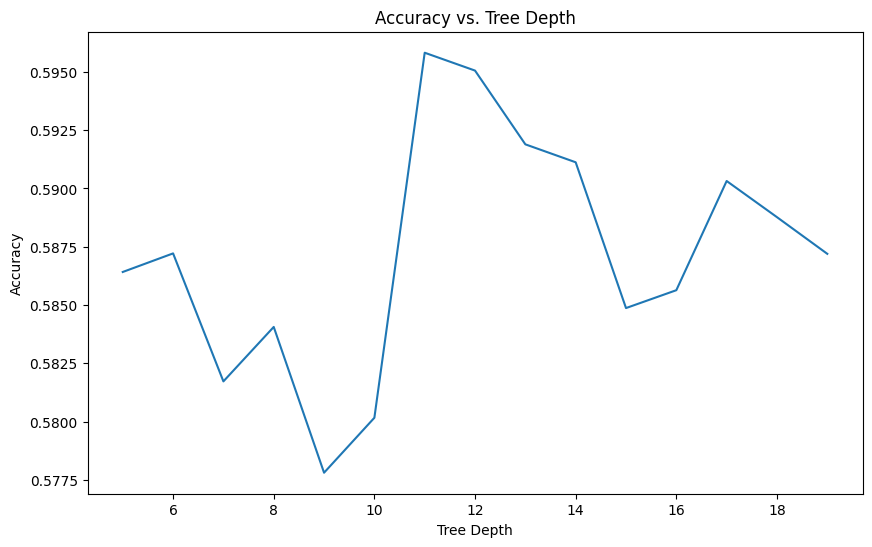

In [ ]:
#how much does the tree depth affect the accuracy?
#plot tree_depth vs accuracy above
#interesting that the cross-validation accuracy peaks but the test accuracy slightly lower than default parameters, but the depth is only 12 vs. 20
plt.figure(figsize=(10, 6))
plt.plot(range(5, 20), dtree_grid.cv_results_['mean_test_score'])
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Tree Depth')

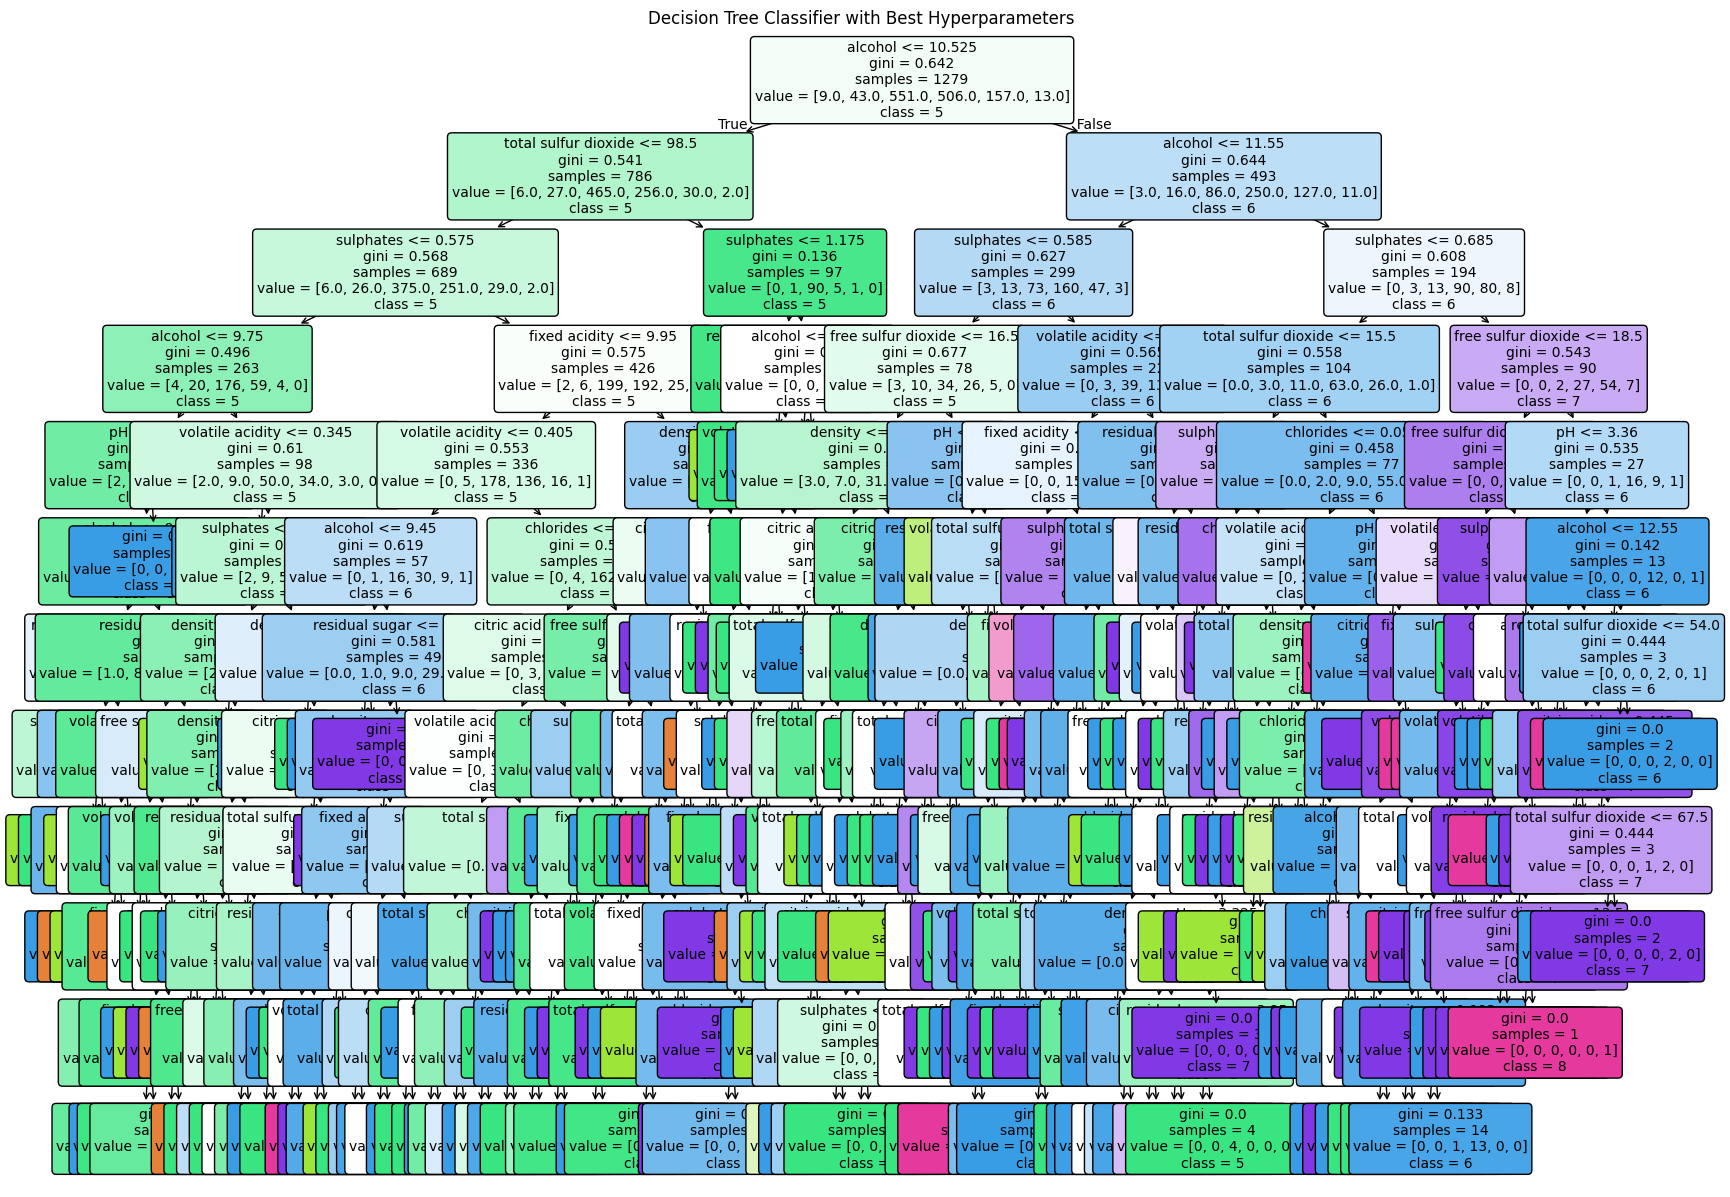

In [ ]:
#plot decision tree with best parameters from above
#being 12 levels deep it is hard to read, but it is interesting to see the progression of features (characteristics) that split the
#classes and it is much easier to read than 20 deep decision tree


plt.figure(figsize=(20, 15))
best_dtree_model = dtree_grid.best_estimator_.named_steps['classifier']
feature_names = X_train_red.columns
class_names = [str(c) for c in sorted(y_train_red.unique())]

plot_tree(best_dtree_model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Classifier with Best Hyperparameters')
plt.savefig('dtree_best_params_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#ENSEMBLE METHODS - to improve the results I will explore a few ensemble methods using classfiers above in this order:
#RANDOM FOREST
#BAGGING ON SVC
#STACKING ON MULTIPLE CLASSIFIER MODELS

In [ ]:
#RANDOM FOREST (ENSEMBLE METHOD)

# Build pipeline for Random Forest Classifier (will not use scaling)
rf_pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))])

# Define the parameter grid
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300], # how many trees in the forest
    'classifier__max_depth': [None, 7, 15, 25], # how deep the trees should go
    'classifier__min_samples_leaf': [1, 2, 4, 8] # min samples per leaf node
}

# Create GridSearchCV
rf_grid = GridSearchCV(rf_pipe, param_grid_rf, cv=5, scoring='accuracy', verbose=1)

# fit to the training data
rf_grid.fit(X_train_red, y_train_red)



Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 7, 15, 25],
                         'classifier__min_samples_leaf': [1, 2, 4, 8],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
# Print the best parameters and best score
print('Best parameters' , rf_grid.best_params_)
print('Best cross-validation accuracy', rf_grid.best_score_)

# score the best Random Forest model on test set
test_accuracy_rf = rf_grid.score(X_test_red, y_test_red)
print('Best test set accuracy', test_accuracy_rf)


Best parameters {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 300}
Best cross-validation accuracy 0.6919791666666667
Best test set accuracy 0.6625


In [ ]:
#RandomForest method provides a considerable boost to model performce with test set accuracy of 66.25%, which is significantly above the Decision Tree accuracy of 56%

In [ ]:
#BAGGING METHOD FOR SVC (next ensemble method to test)

# using the best parameters for SVC (C=10, kernel='rbf')
best_svc_estimator = SVC(C=10, kernel='rbf')

# pipeline with StandardScaler and BaggingClassifier with SVC
bagging_svc_pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('bagging', BaggingClassifier(estimator=best_svc_estimator, random_state=42))
])

# Define parameter grid
param_grid_bagging_svc = {
    'bagging__n_estimators': [10, 50, 100],  #number of base estimators to try
    'bagging__max_samples': [0.5, 0.7, 1.0], # fraction of samples from X
    'bagging__max_features': [0.5, 0.7, 1.0] #fraction of features from X
}

# Create GridSearchCV
bagging_svc_grid = GridSearchCV(bagging_svc_pipe, param_grid_bagging_svc, cv=5, scoring='accuracy', verbose=1)

# Fit to trainning data
bagging_svc_grid.fit(X_train_red, y_train_red)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('bagging',
                                        BaggingClassifier(estimator=SVC(C=10),
                                                          random_state=42))]),
             param_grid={'bagging__max_features': [0.5, 0.7, 1.0],
                         'bagging__max_samples': [0.5, 0.7, 1.0],
                         'bagging__n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
# print best parameters and best score
print('Best parameters for BaggingClassifier with SVC', bagging_svc_grid.best_params_)
print('Best cross-validation accuracy', bagging_svc_grid.best_score_)

# score best model on the test set
test_accuracy_bagging_svc = bagging_svc_grid.score(X_test_red, y_test_red)
print('Test set accuracy with best BaggingClassifier', test_accuracy_bagging_svc)

Best parameters for BaggingClassifier with SVC {'bagging__max_features': 1.0, 'bagging__max_samples': 1.0, 'bagging__n_estimators': 50}
Best cross-validation accuracy 0.6411764705882353
Test set accuracy with best BaggingClassifier 0.603125


In [ ]:
#Bagging method on SVC produces only slightly better results than the SVC classifier without bagging
#The best result so far is the Random Forest classifier at 66% accuracy


In [ ]:
#STACKING ENSEMBLE METHOD
#Stacking combines the best of the earlier models (base models) and feeds them into a Logistic Regression (final model)
#My research indicates that it works well with this type of dataset and boosts the results from individual models
#It also allows us to incorporate the Random Forest as a base model which is our strongest ensemble model so far

# using the best tuned models from previous steps
estimators = [
    ('lr', lrc_grid.best_estimator_),
    ('knn', knn_grid.best_estimator_),
    ('svc', svc_grid.best_estimator_),
    ('rf', rf_grid.best_estimator_)
]

# build the StackingClassifier
# Using a simple LogisticRegression as the final model
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42, max_iter=5000),
    cv=5
)

# tuning the C and using l2 regurization on the final model (logisitic regression) of StackingClassifier
param_grid_stack = {
    'final_estimator__C': [0.01, 0.1, 1, 10],
    'final_estimator__penalty': ['l2']
}

# GridSearchCV on stacking_clf
stack_grid = GridSearchCV(stacking_clf, param_grid_stack, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
stack_grid.fit(X_train_red, y_train_red)



Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=StackingClassifier(cv=5,
                                          estimators=[('lr',
                                                       Pipeline(steps=[('scaling',
                                                                        StandardScaler()),
                                                                       ('classifier',
                                                                        LogisticRegression(C=0.067,
                                                                                           max_iter=1000,
                                                                                           solver='saga'))])),
                                                      ('knn',
                                                       Pipeline(steps=[('scaling',
                                                                        StandardScaler()),
                                                                       ('classifier',
                                                                        KNeighborsClassifier(n_neighbors=1))])),
                                                      ('svc',
                                                       Pipeline(steps=[('scaling',
                                                                        StandardScaler()),
                                                                       ('classifier',
                                                                        SVC(C=10))])),
                                                      ('rf',
                                                       Pipeline(steps=[('classifier',
                                                                        RandomForestClassifier(min_samples_leaf=2,
                                                                                               n_estimators=300,
                                                                                               random_state=42))]))],
                                          final_estimator=LogisticRegression(max_iter=5000,
                                                                             random_state=42)),
             param_grid={'final_estimator__C': [0.01, 0.1, 1, 10],
                         'final_estimator__penalty': ['l2']},
             scoring='accuracy', verbose=1)

In [ ]:
# Print the best Stacking parameters and best score
print('best parameters for StackingClassifier', stack_grid.best_params_)
print('best cross-validation accuracy for StackingClassifier' , stack_grid.best_score_)

# score best StackingClassifier on the test set
test_accuracy_stack = stack_grid.score(X_test_red, y_test_red)
print('Test set accuracy best StackingClassifier', test_accuracy_stack)

best parameters for StackingClassifier {'final_estimator__C': 10, 'final_estimator__penalty': 'l2'}
best cross-validation accuracy for StackingClassifier 0.6677481617647059
Test set accuracy best StackingClassifier 0.678125


In [ ]:
#Stacking results in a slight improvement over Random Forest classifier to nearly 68% accuracy
#How do we improve from here?


In [ ]:
#ADDTIONAL FEATURE ENGINEERING
#use some addtional feature engineering to see if possible to get to closer to 90% or better
#one thought I have is to re-map the scoring into smaller number of useful classes this should simplify decision boundaries

#Wine Spectator (well known wine industry publication) breaks down wines into the categories as shown below
#Wine Spectator tasters review wines on the following 100-point scale:
#95-100 Classic: a great wine
#90-94 Outstanding: a wine of superior character and style
#85-89 Very good: a wine with special qualities
#80-84 Good: a solid, well-made wine
#75-79 Mediocre: a drinkable wine that may have minor flaws
#50-74 Not recommended

#As the wines in the dataset were originally judged on a 0-10 scale, but only received scores in the range of 3 to 8
#I would break down the categories in the dataset as follows:
#0-4 Not Good (Wine Spectator would call these Not Recommended and Mediocre, I prefer the relative term of Not Good because I would
#avoid drinking such wines and will combine them)
#5-6 Good (that encompasses the mean of 5.6 for 'quality', which is good everyday drinking wine)
#7-8 Very Good (9-10 would be Outstanding, but we don't have any 9-10 wines in the dataset)
#9-10 Outstanding (there are no wines in the dataset with this rating)

In [ ]:
#TRANSFORM (RE-MAP) THE 'QUALITY' SCORE
#mapping the 'quality' as Not Good, Good, Very Good
#first make an idependent copy of the red_vinho dataset just to make sure there is not accidental affect on the work above
red_vinho_mapped = red_vinho.copy()


In [ ]:
#map the exisitng 'quality' ratings of 3 to 8 into these 3 new classes
#the new classes are string values, but will be numerically ordinal encoded where needed
red_vinho_mapped = red_vinho_mapped.replace({'quality' : {
                                    8 : 'Very Good',
                                    7 : 'Very Good',
                                    6 : 'Good',
                                    5 : 'Good',
                                    4 : 'Not Good',
                                    3 : 'Not Good',

        }}
)

In [ ]:
#the classes (categories) still remain imbalanced, but this is probably reasonable as we would expect most wines to fall in the
#middle class of 'Good' and considerably fewer to be 'Very Good'
red_vinho_mapped['quality'].value_counts()

,count
quality,
Good,1319
Very Good,217
Not Good,63


In [ ]:
#create test and train datasets from red_vinho_mapped
X_mapped = red_vinho_mapped.drop('quality', axis=1)
y_mapped = red_vinho_mapped['quality']
X_train_mapped, X_test_mapped, y_train_mapped, y_test_mapped = train_test_split(X_mapped, y_mapped, test_size=0.2, random_state=42)

In [ ]:
#TRY SEVERAL OF STRONGER MODELS ABOVE WITH THE "RE-ENGINEERED" 3 CLASS DATASET:
#RANDOM FOREST
#SVC CLASSIFIER
#KNeighbors Classifier (KNN)
#STACKING

In [ ]:

#RANDOM FOREST WITH NEW 3 CLASS QUALITY FEATURE
#Random Forest classifier because it gave strong results above and does not require numerical (ordinal) encoding of the y_mapped
#3 'quality' classes Not Good, Good, Very Good

# set up GridSearchCV for rf_pipe_mapped
rf_grid_mapped = GridSearchCV(rf_pipe, param_grid_rf, cv=5, scoring='accuracy', verbose=1) #using rf_pipe and param_grid_rf from above

# fit to the training data
rf_grid_mapped.fit(X_train_mapped, y_train_mapped)



Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 7, 15, 25],
                         'classifier__min_samples_leaf': [1, 2, 4, 8],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
# Print the best parameters and best score
print('Best parameters for Random Forest', rf_grid_mapped.best_params_)
print('Best cross-validation accuracy for Random Forest', rf_grid_mapped.best_score_)

# score best Random Forest model on the test set
test_accuracy_rf_mapped = rf_grid_mapped.score(X_test_mapped, y_test_mapped)
print('Test set accuracy best Random Forest', test_accuracy_rf_mapped)

Best parameters for Random Forest {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 200}
Best cross-validation accuracy for Random Forest 0.8663082107843139
Test set accuracy best Random Forest 0.86875


In [ ]:
#Fantastic improvement in the results with our Random Forest model now providing almost 87% accuaracy

In [ ]:

#SVC WITH 3 CLASSES
#use GridSearchCV to tune SVC hyperparameters
# Define the parameter grid for GridSearchCV
param_grid_svc_mapped = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf']
}

# build GridSearchCV
svc_grid_mapped = GridSearchCV(svc_pipe, param_grid_svc_mapped, cv=5, scoring='accuracy', verbose=1) #using svc_pipe from above

# Fit to the training data
svc_grid_mapped.fit(X_train_mapped, y_train_mapped)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [ ]:
# Print the best parameters and best score
print('best parameters', svc_grid_mapped.best_params_)
print('best cross-validation accuracy SVC' , svc_grid_mapped.best_score_)

# Evaluate the best model on the test set
test_accuracy_svc_mapped = svc_grid_mapped.score(X_test_mapped, y_test_mapped)
print('test set accuracy SVC', test_accuracy_svc_mapped)

best parameters {'classifier__C': 10, 'classifier__kernel': 'rbf'}
best cross-validation accuracy SVC 0.8506617647058823
test set accuracy SVC 0.8625


In [ ]:
#tuned SVC classifier pretty much on par with the Random Forest over 86% accuracy

In [ ]:
#K-NEAR NEIGHBORS (KNN) WITH 3 CLASSES

In [ ]:
#GridSearch CV on KNN to tune hyperparameters
# Define the parameter grid for the 3 class dataset (in case we want to alter range)
param_grid_knn_mapped = {
    'classifier__n_neighbors': range(1, 21)
}
#build the GridSearchCV
knn_grid_mapped = GridSearchCV(knn_pipe, param_grid_knn_mapped, cv=5, scoring='accuracy', verbose=1)

#fit the GridSearchCV
knn_grid_mapped.fit(X_train_mapped, y_train_mapped)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': range(1, 21)},
             scoring='accuracy', verbose=1)

In [ ]:
# Print the best parameters and best score
print('Best parameters for KNN' , knn_grid_mapped.best_params_)
print('Best cross-validation accuracy for KNN', knn_grid_mapped.best_score_)
test_accuracy_knn_mapped = knn_grid_mapped.score(X_test_mapped, y_test_mapped)
print('Best test set accuracy KNN', test_accuracy_knn_mapped)

Best parameters for KNN {'classifier__n_neighbors': 4}
Best cross-validation accuracy for KNN 0.8412898284313725
Best test set accuracy KNN 0.846875


In [ ]:

#STACKING WITH 3 CLASSES
#use the best tuned models from previous steps
estimators = [
    ('lr', lrc_grid.best_estimator_), # Best Logistic Regression pipeline
    ('knn', knn_grid.best_estimator_),    # Best KNN pipeline
    ('svc', svc_grid.best_estimator_),    # Best SVC pipeline
    ('rf', rf_grid.best_estimator_)      # Best Random Forest pipeline
]

# build the StackingClassifier ensemble
# Using LogisticRegression as the final model
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    cv=5, # Number of cross-validation folds
    n_jobs=-1 # Use all available cores
)

# Define parameter grid for tuning the final LR model of StackingClassifier
param_grid_stack = {
    'final_estimator__C': [0.01, 0.1, 1, 10],
    'final_estimator__penalty': ['l2'] # LogisticRegression with default solver (lbfgs) supports l2
}

# create GridSearchCV for stacking_clf
stack_grid_mapped = GridSearchCV(stacking_clf, param_grid_stack, cv=5, scoring='accuracy', verbose=1, n_jobs=-1) #helps it run faster

# fit to the training data
stack_grid_mapped.fit(X_train_mapped, y_train_mapped)

# Print the best parameters and best score
print('Best parameters for StackingClassifier', stack_grid_mapped.best_params_)
print('Best cross-validation accuracy for StackingClassifier', stack_grid_mapped.best_score_)

# score best StackingClassifier model on test set
test_accuracy_stack_mapped = stack_grid_mapped.score(X_test_mapped, y_test_mapped)
print('Test set accuracy best StackingClassifier', test_accuracy_stack_mapped)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for StackingClassifier {'final_estimator__C': 0.1, 'final_estimator__penalty': 'l2'}
Best cross-validation accuracy for StackingClassifier 0.8592738970588236
Test set accuracy best StackingClassifier 0.859375


/tmp/ipython-input-505533351.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')


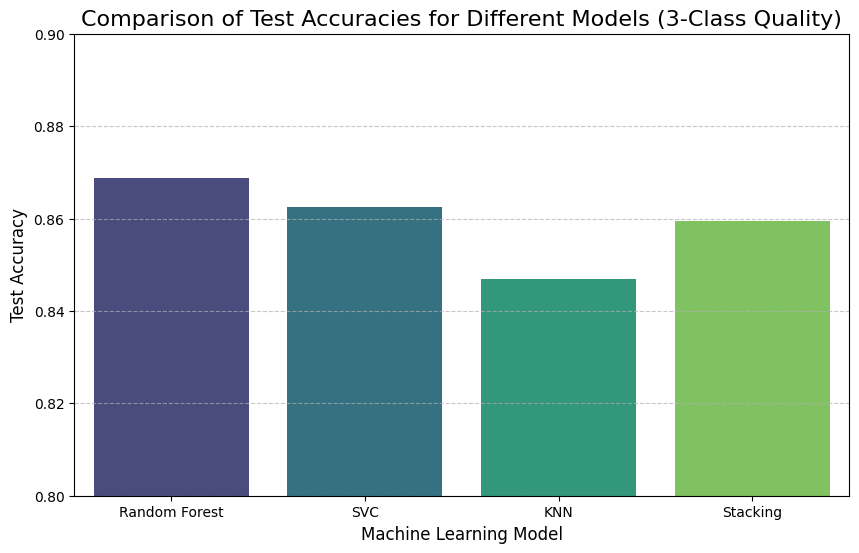

In [ ]:
#COMPARING RESULTS OF 3 CLASS MODELS

# take model names and their test accuracies, and put into a dataframe to plot
models = ['Random Forest', 'SVC', 'KNN', 'Stacking']
accuracies = [
    test_accuracy_rf_mapped,
    test_accuracy_svc_mapped,
    test_accuracy_knn_mapped,
    test_accuracy_stack_mapped
]
accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# Create the bar chart with labels
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Comparison of Test Accuracies for Different Models (3-Class Quality)', fontsize=16)
plt.xlabel('Machine Learning Model', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.ylim(0.8, 0.9) # Set y-axis limits to highlight differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('model_accuracies_3class.png', dpi=300, bbox_inches='tight') # Save the plot as a PNG file
plt.show()

In [ ]:
#RESULTS WILL BE SUMMARIZED IN THE CAPSTONE FINAL REPORT
#CONCLUSIONS ALSO CONTAINED IN CAPSTONE FINAL REPORT